<a href="https://colab.research.google.com/github/Sjoerd-de-Witte/Machine-Learning-2023/blob/main/1_5_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!gdown -O /tmp/ml.py 174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
%run /tmp/ml.py

Downloading...
From: https://drive.google.com/uc?id=174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
To: /tmp/ml.py
100% 1.31k/1.31k [00:00<00:00, 6.22MB/s]


# Logistic Regression

# Classification

Another type of tasks is to predict the class $y$ of an observation $X$. The difference with regression is that we are not predicting a value on a continuous scale (e.g. temperature, house price), but rather predict to which class something or someone belongs (e.g. male/female). We start by looking at binary classification, e.g. ill/not-ill, spam/not-spam. To simplify our first classification attempts, we will assume that every observation belong to exactly one class.

In order to use regression analysis for classification, we usually code these binary classes as 0 and 1:

$$y \in \{0,1\}$$

The only thing that changes in out workflow is that we should have a binary target variable, and we fit a classification model instead of a regression model.

# Data

You will use the `wine_quality` dataset. In this dataset, (chemical) observations are recorded for bottles of Portguese Red wine. The target variable `quality` is a grade that was given by an expert jury on a scale 1-10.

In [4]:
from pipetorch import DFrame
from sklearn.linear_model import LogisticRegression

In [5]:
df = DFrame.read_from_kaggle('uciml/red-wine-quality-cortez-et-al-2009')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We will turn this dataset into a classification task assigning the quality range 1-5 to class 0 (bad wine) and the quality range 6-10 to class 1 (good wine).

In [7]:
# create a class (Good/Bad) label
df['class'] = df.quality > 5

In [8]:
df = df[['pH', 'alcohol', 'class']]

In [9]:
df.head()

,pH,alcohol,class
0,3.51,9.4,False
1,3.20,9.8,False
2,3.26,9.8,False
3,3.16,9.8,True
4,3.51,9.4,False


By visualizing the dataset, it becomes clear that there is no decision boundary that will prefectly separate good from bad wines. However, below 10% alcohol there are more bad wines, while above 10% alcohol there are more good wines. In other words, we can imagine a decision boundary that will do better than random guessing.

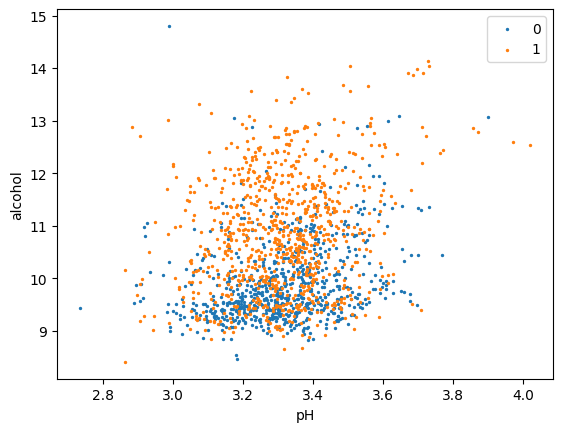

In [10]:
# here, noise=0.1 slightly spreads the datapoints to create a better visual
df.train.scatter2d_class(s=2, noise=0.1)

# Model

We use one of the most commonly used `classifiers`, which is multivariate regression with a logistic function, also called `LogisticRegression`. Regardless of its name, this is not a regression model but a classification model. We will explain how logistic regression works in more detail in upcoming weeks.

In [11]:
# instantiate a LogisticRegression model
model = LogisticRegression()

# Train

In [12]:
# fit the model on the training set like with LinearRegression
model.fit(df.train_X, df.train_y);

# Validation

To validate the model, we will draw a `decision boundary` over the training data so that we can inspect if the model makes sense. Note that in this case the decision boundary is linear because we use a form of linear regression without higher order polynomials. And a good position for the decision boundary is the point where we maximize the number good wines that are classified on one side and the number of bad wines on the other side.

The `noise` parameter adds a bit of noise to the feature values, so that data points with the same values will be overlapping less.

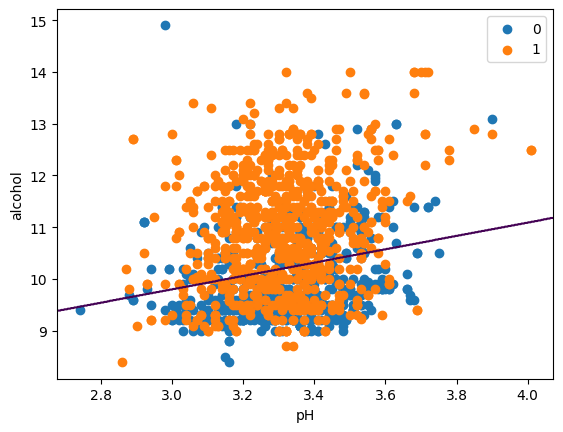

In [13]:
# Create a plot that shows the decision boundary over a scatter graph
df.train.scatter2d_class()
df.train.plot_boundary(model.predict)

We can also visualize which data points are correctly and which are not correctly predicted. The orange are the correct predictions and the blue dots are the incorrect predictions.

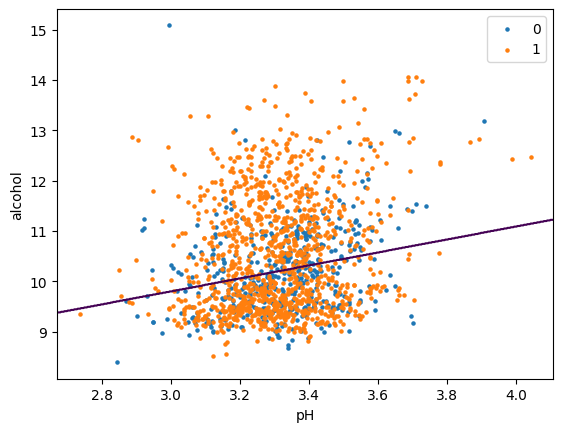

In [14]:
pred_y = model.predict(df.train_X)
correct = pred_y == df.train_y
df.train.scatter2d_class(s=5, y=correct, noise=0.1)
df.plot_boundary(model.predict)

In [ ]:
halt_notebook()